Исследуем, есть ли взаимосвязь между такими параметрами, как номер рейса, аэропорт вылета, число рейсов авиакомпании/в день недели из конкретного аэропорта, и суммарным временем задержек/максиальным временем задержки и т.д.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('flights.csv', dtype=str)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().any(axis=0)
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]

In [5]:
pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
cols = list(df.columns)
cols[-1:] + cols[:-1]
df = df[cols[-1:] + cols[:-1]]
df.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,0020,0018,-2,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,0025,0024,-1,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]

In [8]:
df['FLIGHT_NUMBER'].value_counts()

469     3596
327     3213
326     3150
403     3089
667     3025
        ... 
6705       1
6752       1
6758       1
6623       1
6887       1
Name: FLIGHT_NUMBER, Length: 6946, dtype: int64

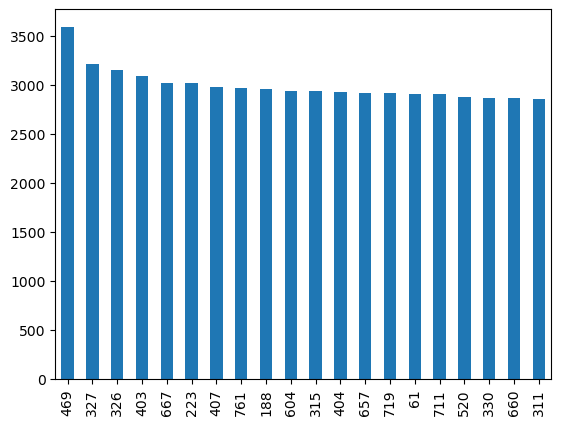

In [14]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.FLIGHT_NUMBER.value_counts()[:20].plot(kind='bar')
plt.show()

In [136]:
df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)
xx=df.groupby('FLIGHT_NUMBER')['DEPARTURE_DELAY'].sum().sort_values()[::-1]
#df.groupby('FLIGHT_NUMBER')['DEPARTURE_DELAY'].agg(lambda x: x[x>0].sum()).sort_values(ascending=False)

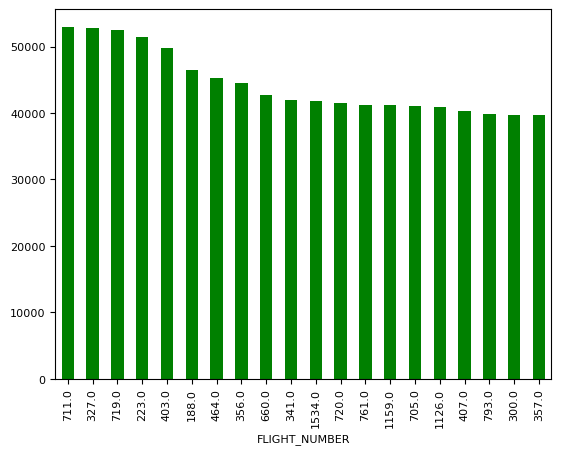

In [137]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
df.groupby('FLIGHT_NUMBER')['DEPARTURE_DELAY'].agg(lambda x: x[x>0].sum()).sort_values(ascending=False).head(20).plot(kind='bar',color='green')
plt.show()

<Axes: xlabel='FLIGHT_NUMBER'>

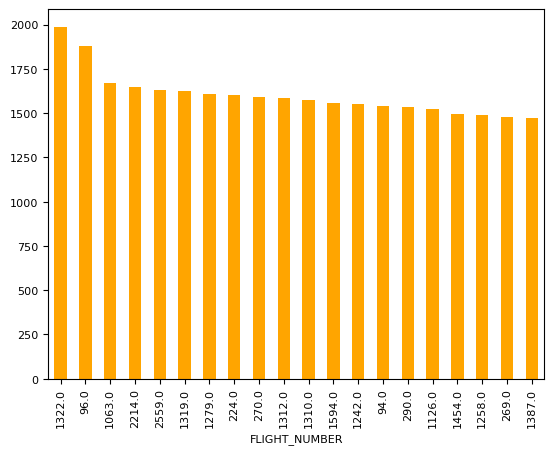

In [138]:
df.groupby('FLIGHT_NUMBER')['DEPARTURE_DELAY'].max().sort_values(ascending=False).head(20).plot(kind='bar',color='orange')

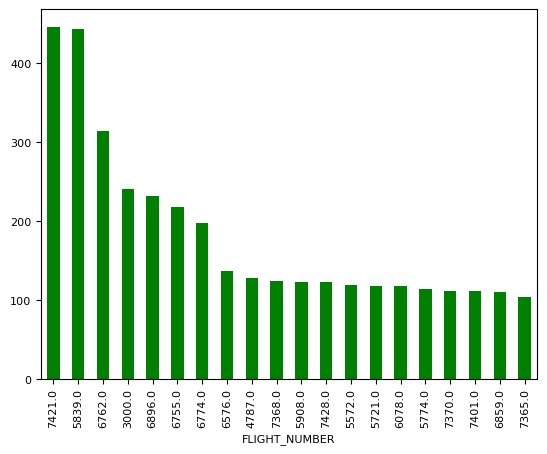

In [148]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
df.groupby('FLIGHT_NUMBER')['DEPARTURE_DELAY'].agg(lambda x: x[x>0].mean()).sort_values(ascending=False).head(20).plot(kind='bar',color='green')
plt.show()

In [142]:
#plt.figure(figsize = (24, 16))
#plt.title('Correlation')
#ax = sb.heatmap(xx.corr(), annot=True, linewidths=3, linecolor='black')
xx=np.transpose(xx)
xx

FLIGHT_NUMBER
711.0     46174.0
719.0     44817.0
327.0     44798.0
223.0     44036.0
403.0     43101.0
           ...   
7398.0    -1216.0
7378.0    -1277.0
7396.0    -1364.0
7385.0    -1374.0
7384.0    -1496.0
Name: DEPARTURE_DELAY, Length: 6946, dtype: float64

ValueError: If using all scalar values, you must pass an index

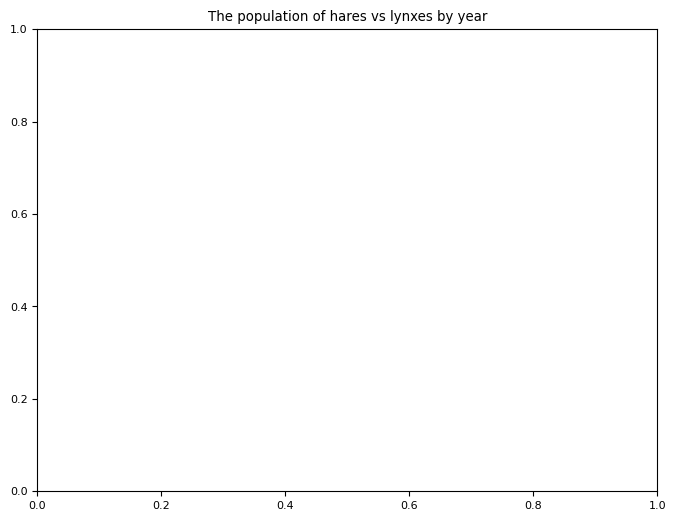

In [144]:
import seaborn as sb
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = '8'
correl = sb.scatterplot(x = xx[1], y = xx[2])

plt.show()
##как сделать, чтоб работало?